In [1]:
import cv2
import numpy as np
import os


class HoughLineCircleDetection:
    def __init__(self, path):
        self.image_path = path
        self.image = cv2.imread(self.image_path)

    def line_detection(self):
        """
        hough line detection based out of canny edge detection
        """
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150, apertureSize=3)
        lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * a)
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * a)
            cv2.line(self.image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.imwrite(os.path.join("houghlines.jpg"), self.image)

    def circle_detection(self):
        """ hough circle detection based out of canny circle detection"""
        ## gray-scale image conversion
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        ## To reduce noise, blur the image.
        img = cv2.medianBlur(gray, 5)
        cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        ## # Apply hough transform on the image
        circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 50,
                                  param1=50, param2=30, minRadius=0, maxRadius=0)
        circles = np.uint16(np.around(circles))
        ##  detected circles
        for i in circles[0, :]:
            # outer circle
            cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # draw the center of the circle
            cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        cv2.imwrite(os.path.join("detected_circles.jpg"), cimg)
        
# Hough Transforms for Line and circle
image_path_src = os.path.join("test.jpg")
hough_object = HoughLineCircleDetection(image_path_src)
hough_object.line_detection()
hough_object.circle_detection()

In [2]:
image0 = cv2.imread("test.jpg")
image1 = cv2.imread("houghlines.jpg")
image2 = cv2.imread("detected_circles.jpg")

In [3]:
import matplotlib.pyplot as plt
def plt_imshow(image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.grid(False)
	plt.show()

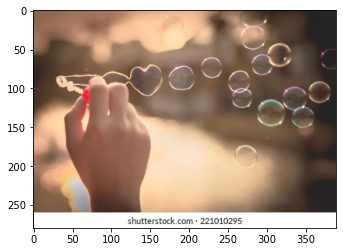

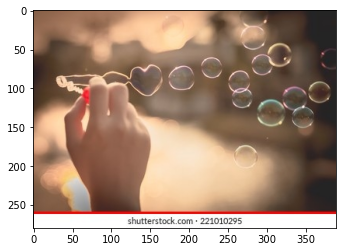

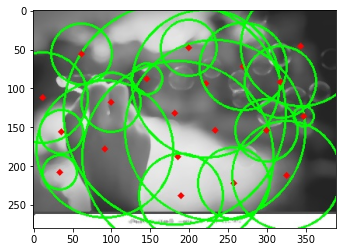

In [4]:
plt_imshow(image0)
plt_imshow(image1)
plt_imshow(image2)